## Six population temporal dynamics figs
Leaving this untouched, this was for the original analysis for a BII meeting in November

In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import iBioGen

from collections import Counter
from itertools import combinations
from IPython.display import display

pd.set_option('display.max_columns', None)

ipyclient = ipp.Client(cluster_id="iBioGen")
len(ipyclient)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


40

In [62]:
data = iBioGen.Core("BII")
data.set_param("assembly_model", "neutral")
data.set_param("ntaxa", 7)
data.set_param("ClaDS", False)
data.set_param("ecological_strength", "1")
data.set_param("colrate", "0.003")
data.set_param("J", "10000")
data.set_param("local_stop_time", 0.25)
data.set_param("local_stop_criterion", "equilibrium")
tre, results = data._simulate(verbose=True)

ntips 7
time 1.7312692394782225
Birth events 6
Extinctions (per birth) 0 (0.0)


In [57]:
#l._step_wf(100)
data.l._check_stop()
print(data.l._lambda)
data.l._finalize()
data.l.community

0.254


,coltime,local_abund,migrants,trait,tau,pi,is_founder
m4-2,0.0,7460,108.0,-4.095092,99.0,0.023911,1.0
m2-1,0.0,1528,1919.0,2.737257,99.0,0.025422,0.0
m6-2,0.0,28,106.0,-4.544414,99.0,0.000400,0.0
m5-1,0.0,167,94.0,0.314457,98.0,0.010000,0.0
m5-2,0.0,260,354.0,-0.310833,99.0,0.014178,0.0
m3-2,0.0,551,645.0,-0.618205,99.0,0.015156,0.0
m6-1,102.0,6,4.0,-4.616743,99.0,0.000000,0.0


In [63]:

abunds = pd.DataFrame([], index=[t.name for t in data.m.tips])

data.l._check_stop()
idx = 0
while data.l._lambda < 0.95 and idx < 100:
    print(data.l._lambda, end=", ")

    abunds[idx] = data.l.community["local_abund"]

    data.l._step_wf(10)
    data.l._check_stop()
    

    idx += 1
    

# record the last bit
abunds[idx] = data.l.community["local_abund"]
abunds = abunds.fillna(0)

0.25429999999999997, 0.2599, 0.26970000000000005, 0.2773, 0.28800000000000003, 0.2824, 0.272, 0.2946, 0.2975, 0.33109999999999995, 0.35340000000000005, 0.35109999999999997, 0.382, 0.40390000000000004, 0.4224, 0.4336, 0.43720000000000003, 0.4599, 0.4557, 0.4455, 0.47130000000000005, 0.47319999999999995, 0.4747, 0.48140000000000005, 0.4918, 0.5052, 0.5358, 0.5537000000000001, 0.5646, 0.5860000000000001, 0.5882000000000001, 0.5802, 0.6166, 0.6084, 0.6184000000000001, 0.6385000000000001, 0.6496, 0.6678999999999999, 0.6731, 0.702, 0.6798, 0.6851, 0.6679999999999999, 0.7011000000000001, 0.7088, 0.74, 0.7597, 0.7486999999999999, 0.7841, 0.8092, 0.8103, 0.796, 0.8065, 0.8336, 0.8403, 0.8524, 0.8571, 0.8563000000000001, 0.8521, 0.8611, 0.8719, 0.886, 0.88, 0.891, 0.8892, 0.9042, 0.9009, 0.9033, 0.8892, 0.8918, 0.895, 0.8979, 0.9113, 0.8906000000000001, 0.8883, 0.89, 0.8895, 0.8718, 0.8599, 0.8438, 0.8456, 0.8401000000000001, 0.8407, 0.8338, 0.8385, 0.8210999999999999, 0.8224, 0.8308, 0.8365, 0.

In [71]:
abunds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
m4-1,1259,1412,1479,1566,1607,1474,1473,1481,1609,1685,1667,1746,1925,2172,2203,2048,2260,2423,2186,2052,2270,2256,2286,2258,2321,2421,2349,2207,2387,2500,2546,2481,2644,2569,2633,2748,2649,2652,2619,2818,2614,2573,2624,2967,3062,2991,2904,2916,3020,2845,2948,2731,2770,2753,2843,2903,2759,2866,2916,3016,3116,3213,3173,3316,3273,3482,3332,3334,3315,3059,2997,3001,3102,3062,3059,3042,3124,3254,3335,3305,3688,3794,3725,3688,3653,3432,3332,3345,3268,3386,3410,3409,3466,3810,3696,3817,3795,3903,3969,4072,4216
m6-1,187,179,160,126,153,172,189,165,157,188,122,111,126,151,145,188,151,180,119,218,194,299,259,283,299,213,309,322,293,312,316,281,324,285,239,145,121,176,165,221,249,264,227,224,205,268,370,321,315,286,260,236,330,315,283,372,421,393,368,351,379,449,428,426,424,473,506,530,628,784,749,889,795,658,723,736,630,557,571,599,445,378,462,451,630,670,569,499,495,491,564,616,486,437,435,339,303,226,233,217,277
m6-2,105,99,123,91,80,73,65,93,85,99,72,54,101,79,147,242,191,223,257,232,248,205,144,106,78,43,62,62,63,77,87,32,50,63,37,37,46,48,76,96,72,61,74,172,158,168,114,111,155,157,90,101,96,118,105,126,151,156,102,91,70,39,55,55,65,64,45,24,21,19,44,65,63,127,54,49,56,70,48,67,36,86,102,99,86,81,75,76,54,75,37,35,48,42,43,60,80,56,85,59,46
m5-1,103,88,71,104,50,44,69,76,84,88,64,104,128,113,175,186,107,73,75,65,78,93,100,188,137,197,229,264,291,320,318,297,226,263,327,236,176,196,242,253,263,189,217,196,201,277,241,414,396,391,430,398,279,328,300,216,262,233,275,252,279,240,264,222,145,115,141,121,81,125,115,158,184,168,207,154,256,255,188,174,126,113,145,111,138,206,237,233,237,206,168,253,216,225,256,249,233,228,255,252,355
m5-2,331,259,285,335,432,459,363,390,303,412,419,336,461,390,414,398,440,441,415,391,424,402,441,434,550,487,616,729,620,657,544,587,605,623,512,718,894,932,1023,964,933,951,720,801,870,844,992,1036,1268,1316,1265,1342,1171,1322,1310,1376,1527,1507,1645,1760,1774,1675,1542,1621,1684,1583,1795,1813,1820,1878,1892,1711,1554,1663,1517,1584,1587,1462,1430,1347,1334,1050,968,910,970,1156,1372,1367,1421,1439,1432,1390,1425,1448,1443,1407,1458,1526,1667,1655,1518
m3-1,558,562,579,551,558,602,561,741,737,839,1190,1160,1079,1134,1140,1274,1223,1259,1505,1497,1499,1477,1517,1545,1533,1691,1793,1953,1992,1994,2071,2124,2317,2281,2436,2501,2610,2675,2606,2668,2667,2813,2818,2651,2592,2852,2976,2689,2687,3097,3110,3152,3419,3500,3562,3531,3451,3408,3215,3141,3101,3244,3338,3270,3301,3325,3190,3211,3027,3053,3153,3155,3415,3228,3323,3335,3242,3120,3027,2946,2827,2980,3005,3079,2908,2666,2639,2788,2890,2843,2819,2720,2859,2613,2568,2641,2524,2626,2444,2527,2349
m3-2,7457,7401,7303,7227,7120,7176,7280,7054,7025,6689,6466,6489,6180,5961,5776,5664,5628,5401,5443,5545,5287,5268,5253,5186,5082,4948,4642,4463,4354,4140,4118,4198,3834,3916,3816,3615,3504,3321,3269,2980,3202,3149,3320,2989,2912,2600,2403,2513,2159,1908,1897,2040,1935,1664,1597,1476,1429,1437,1479,1389,1281,1140,1200,1090,1108,958,991,967,1108,1082,1050,1021,887,1094,1117,1100,1105,1282,1401,1562,1544,1599,1593,1662,1615,1789,1776,1692,1635,1560,1570,1577,1500,1425,1559,1487,1607,1435,1347,1218,1239


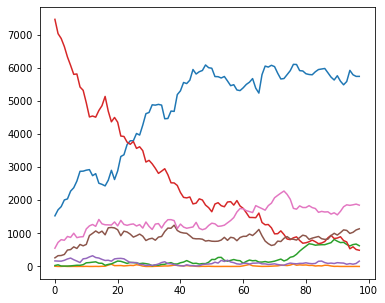

In [59]:
plt.figure(figsize=[6, 5])
#plt.plot(range(len(times["abund_hills"])), np.array(times["abund_hills"])/np.array(times["local_S"]))
for i in abunds.index:
#    if i == "m5-2": pass
#    else:
    plt.plot(abunds.columns, abunds.loc[i])#, color='black')
#plt.savefig("MESS-SixPops-BW.svg")
#plt.savefig("MESS-SixPops-BW.png")
#plt.savefig("MESS-SixPops-Color.svg")
#plt.savefig("MESS-SixPops-Color.png")

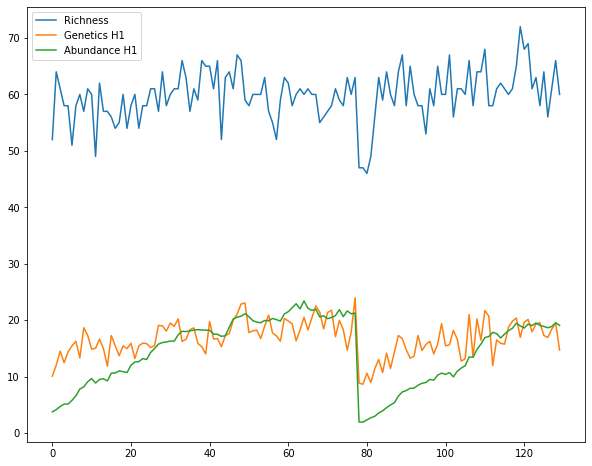

In [49]:
plt.figure(figsize=[10, 8])
plt.plot(range(len(times["local_S"])), times["local_S"], label="Richness")
plt.plot(range(len(times["pi_hills"])), np.array(times["pi_hills"]), label="Genetics H1")
plt.plot(range(len(times["abund_hills"])), np.array(times["abund_hills"]), label="Abundance H1")
plt.legend()
plt.savefig("MESS-DisturbanceHills.svg")
plt.savefig("MESS-DisturbanceHills.png")

63
10000.0
1000
47


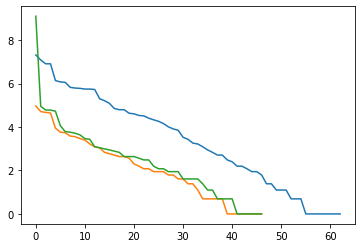

In [44]:
com_pre = data.l.community["local_abund"]
plt.plot(sorted(np.log(com_pre), reverse=True))
probs = data.l.community["local_abund"]/data.paramsdict["J"]
print(len(probs))
nsamp = data.paramsdict["J"]/10
new = np.random.multinomial(nsamp, probs)
print(com_pre.sum())
data.l.community["local_abund"] = new
com_post0 = data.l.community["local_abund"]
print(com_post0.sum())
plt.plot(sorted(np.log(data.l.community["local_abund"][data.l.community["local_abund"] > 0]), reverse=True))
data.l._step_wf(1)
com_post1 = data.l.community["local_abund"]
data.l._check_stop()
plt.plot(sorted(np.log(data.l.community["local_abund"]), reverse=True))
print(len(data.l.community))
times["lambdas"].append(data.l._lambda)
times["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
data.l._finalize()
times["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
times["local_S"].append(len(data.l.community))

In [45]:
gens = 500
while gens > 0:
    print(data.l._lambda, end=", ")
    times["lambdas"].append(data.l._lambda)
    times["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
    data.l._finalize()
    times["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
    times["local_S"].append(len(data.l.community))
    gens -= 10

    data.l._step_wf(10)
    data.l._check_stop()

# record the last bit
times["lambdas"].append(data.l._lambda)
times["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
data.l._finalize()
times["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
times["local_S"].append(len(data.l.community))

0.9962, 0.997, 0.995, 0.9946, 0.9926, 0.9926, 0.9941, 0.9925, 0.9943, 0.9927, 0.9901, 0.9893, 0.9926, 0.9905, 0.9908, 0.9889, 0.9875, 0.9924, 0.9905, 0.9953, 0.9958, 0.9957, 0.9958, 0.995, 0.9956, 0.9958, 0.9976, 0.9985, 0.9959, 0.9972, 0.9956, 0.9965, 0.9962, 0.9968, 0.9976, 0.9989, 0.9994, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

## Competition

In [278]:
data = iBioGen.Core("BII")
data.set_param("assembly_model", "competition")
data.set_param("ntaxa", 200)
data.set_param("ClaDS", False)
data.set_param("ecological_strength", 0.001)
data.set_param("colrate", "0.003")
data.set_param("J", "10000")
data.set_param("local_stop_time", 0.25)
data.set_param("local_stop_criterion", "equilibrium")
tre, results = data._simulate(verbose=True)

ntips 200
time 6.561334930592266
Birth events 316
Extinctions (per birth) 117 (0.370253164556962)


In [279]:
ctimes = {}
ctimes["lambdas"] = []
ctimes["pi_hills"] = []
ctimes["abund_hills"] = []
ctimes["local_S"] = []

data.l._check_stop()
idx = 0
print(data.l._lambda)
while data.l._lambda < 0.95 and idx < 100:
    print(data.l._lambda, end=", ")
    ctimes["lambdas"].append(data.l._lambda)
    ctimes["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
    data.l._finalize()
    ctimes["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
    ctimes["local_S"].append(len(data.l.community))
    idx += 1

    data.l._step_wf(10)
    data.l._check_stop()

# record the last bit
ctimes["lambdas"].append(data.l._lambda)
ctimes["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
data.l._finalize()
ctimes["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
ctimes["local_S"].append(len(data.l.community))

0.2569
0.2569, 0.2692, 0.27959999999999996, 0.29679999999999995, 0.32430000000000003, 0.3539, 0.37339999999999995, 0.40659999999999996, 0.4323, 0.4556, 0.4696, 0.49470000000000003, 0.5154000000000001, 0.5487, 0.573, 0.5718, 0.5739000000000001, 0.5681, 0.5724, 0.5795, 0.5971, 0.6168, 0.6328, 0.6066, 0.6595, 0.6725, 0.6995, 0.7011000000000001, 0.7152000000000001, 0.7089, 0.7279, 0.7378, 0.7368, 0.7136, 0.7274, 0.7236, 0.7356, 0.7569, 0.7635000000000001, 0.7644, 0.771, 0.7622, 0.7638, 0.7548, 0.7561, 0.7428, 0.7156, 0.7361, 0.7317, 0.7334, 0.7387, 0.74, 0.7455, 0.7552, 0.7822, 0.7843, 0.8055, 0.8200000000000001, 0.8276, 0.8225, 0.8251999999999999, 0.8515, 0.8745, 0.8784, 0.8832, 0.8808, 0.8756, 0.8946000000000001, 0.8902, 0.8936, 0.9023, 0.917, 0.9114, 0.9152, 0.9143, 0.9139, 0.9136, 0.901, 0.9046, 0.9238999999999999, 0.9227, 0.9283, 0.933, 0.9390000000000001, 0.9387, 0.9311, 0.9362, 0.9372, 

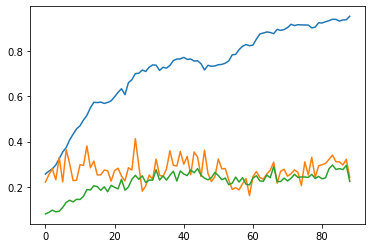

In [280]:

plt.plot(range(len(ctimes["lambdas"])), ctimes["lambdas"])
plt.plot(range(len(ctimes["pi_hills"])), np.array(ctimes["pi_hills"])/np.array(ctimes["local_S"]))
plt.plot(range(len(ctimes["abund_hills"])), np.array(ctimes["abund_hills"])/np.array(ctimes["local_S"]))

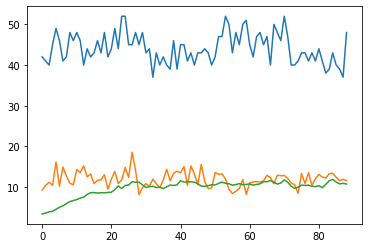

In [281]:
plt.plot(range(len(ctimes["local_S"])), ctimes["local_S"])
plt.plot(range(len(ctimes["pi_hills"])), np.array(ctimes["pi_hills"]))
plt.plot(range(len(ctimes["abund_hills"])), np.array(ctimes["abund_hills"]))

48
10000.0
1000
33


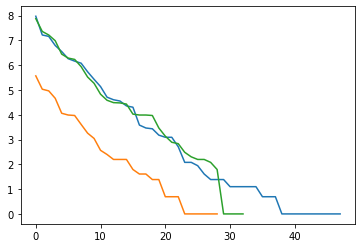

In [282]:
com_pre = data.l.community["local_abund"]
plt.plot(sorted(np.log(com_pre), reverse=True))
probs = data.l.community["local_abund"]/data.paramsdict["J"]
print(len(probs))
nsamp = data.paramsdict["J"]/10
new = np.random.multinomial(nsamp, probs)
print(com_pre.sum())
data.l.community["local_abund"] = new
com_post0 = data.l.community["local_abund"]
print(com_post0.sum())
plt.plot(sorted(np.log(data.l.community["local_abund"][data.l.community["local_abund"] > 0]), reverse=True))
data.l._step_wf(1)
com_post1 = data.l.community["local_abund"]
data.l._check_stop()
plt.plot(sorted(np.log(data.l.community["local_abund"]), reverse=True))
print(len(data.l.community))
ctimes["lambdas"].append(data.l._lambda)
ctimes["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
data.l._finalize()
ctimes["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
ctimes["local_S"].append(len(data.l.community))

In [258]:
gens = 500
while gens > 0:
    print(data.l._lambda, end=", ")
    ctimes["lambdas"].append(data.l._lambda)
    ctimes["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
    data.l._finalize()
    ctimes["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
    ctimes["local_S"].append(len(data.l.community))
    gens -= 10

    data.l._step_wf(10)
    data.l._check_stop()

# record the last bit
ctimes["lambdas"].append(data.l._lambda)
ctimes["abund_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["local_abund"]))
data.l._finalize()
ctimes["pi_hills"].append(iBioGen.util._generalized_hill_number(data.l.community["pi"]))
ctimes["local_S"].append(len(data.l.community))

0.956, 0.9562, 0.9549, 0.951, 0.9474, 0.9442, 0.9533, 0.9528, 0.9518, 0.9482, 0.9456, 0.9514, 0.9424, 0.9401, 0.9436, 0.9473, 0.9561, 0.9558, 0.9545, 0.9493, 0.9526, 0.9442, 0.9515, 0.9625, 0.9583, 0.9588, 0.9702, 0.9741, 0.9747, 0.979, 0.9826, 0.9799, 0.9791, 0.983, 0.9867, 0.9838, 0.984, 0.9788, 0.9793, 0.9811, 0.9791, 0.9758, 0.9778, 0.9763, 0.9747, 0.9715, 0.9656, 0.9652000000000001, 0.9744, 0.9718, 

## Niche specialization

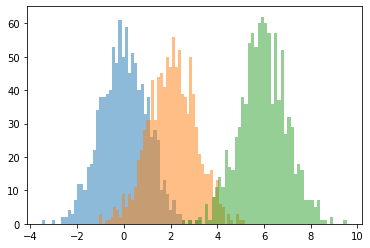

In [292]:
n1 = sorted(np.random.normal(0, 1, 1000))
n2 = sorted(np.random.normal(2, 1, 1000))
n6 = sorted(np.random.normal(6, 1, 1000))
_ = plt.hist(n1, bins=50, alpha=0.5)
_ = plt.hist(n2, bins=50, alpha=0.5)
_ = plt.hist(n6, bins=50, alpha=0.5)


Niche specialization is increased feeding specialization.
* Reduced alpha diversity, shift in composition of the dominant taxa (enrichment for certain metabolites as you become specialized).
* Increased diet specialization, increased evenness and reduced alpha diversity.
* More specialized taxa might increase beta diversity between taxa
* Mammal community varies from 4/5 up to 20. Ecologically and body size structured.
* Hawaii mostly structured through evolutionary processes, how communities would change as you get speciation and diversification
* Specialization within arthropods, how does increased specialization impact the metamicrobiome?

Instead of making the model fit the systems, we should make the systems fit the model.

On a young island things are everywhere and they're generalists

* Functional diversity reduces effective competition
* Maybe the stressor reduces functional diversity somehow?


## Temp trash

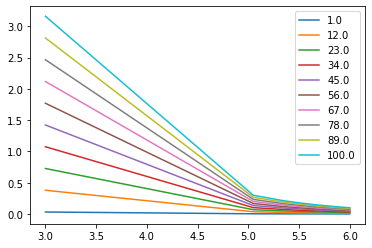

In [317]:
S = np.linspace(1, 100, 10)
N = np.linspace(1000, 1000000, 10)
def Mn(S, N):
    return S/np.sqrt(N)
for s in S:
    Mns = [Mn(s, x) for x in N]
    plt.plot(np.log10(N), Mns, label=s)
plt.legend()